In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pickle
from pandas.plotting import scatter_matrix
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA

In [52]:
with open('google_earnings.csv', 'r', encoding='utf-8') as file:
  lines = file.readlines()
  for i, line in enumerate(lines):
    print(line.strip())
    if i >= 8:
      break

﻿Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",,,
GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",,,
GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",,,
GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,,
GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98


In [53]:
earning_df = pd.read_csv("google_earnings.csv")

In [54]:
earning_df["startdatetime"] = earning_df['Earnings Date'].map(
    lambda date_str: (datetime.strptime(date_str[:-3], "%b %d, %Y, %I %p")).strftime("%Y-%m-%dT%H:%M:%S")
)

In [55]:
earning_df.rename(
    {"Reported EPS": "epsactual",
     "EPS Estimate": "epsestimate",
     "Surprise(%)": "epssurprisepct"},
    axis=1,
    inplace=True)

In [56]:
earning_df["epsactual"] = earning_df["epsactual"].map(
    lambda x: float(x)
)
earning_df["epsestimate"] = earning_df["epsestimate"].map(
    lambda x: float(x)
)
earning_df["epssurprisepct"] = earning_df["epssurprisepct"].map(
    lambda x: float(x)
)

In [57]:
# head() : 데이터 프레임의 시작부를 출력.
earning_df.head()

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
0,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN,2025-10-27T16:00:00
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
2,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00
3,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN,2025-01-28T16:00:00
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29T16:00:00


In [58]:
# dtypes: 각 열이 어떤 데이터 타입인지. (보통 문자열(String)타입일때 object라고 표시됨.)
earning_df.dtypes

,0
Symbol,object
Company,object
Earnings Date,object
epsestimate,float64
epsactual,float64
epssurprisepct,float64
startdatetime,object


In [59]:
# to_csv('저장할 파일 경로', 인덱스 포함여부)
earning_df.to_csv('earning.csv', index=False)

In [60]:
earning_df_from_csv = pd.read_csv('earning.csv')
earning_df_from_csv.head()

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
0,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN,2025-10-27T16:00:00
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
2,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00
3,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN,2025-01-28T16:00:00
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29T16:00:00


In [61]:
# 데이터프레임을 Numpy 배열로 읽어오기.
earning_array = earning_df.values
earning_array[:2]

array([['GOOGL', 'Alphabet Inc', 'Oct 27, 2025, 4 PMEDT', nan, nan, nan,
        '2025-10-27T16:00:00'],
       ['GOOGL', 'Alphabet Inc', 'Jul 21, 2025, 4 PMEDT', nan, nan, nan,
        '2025-07-21T16:00:00']], dtype=object)

In [62]:
# Numpy 배열을 데이터프레임으로 만듦. DataFrame(사용할 데이터, 사용할 컬럼명)
earning_df_from_array = pd.DataFrame(data=earning_array, columns=earning_df.columns.values)
earning_df_from_array.head()

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
0,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN,2025-10-27T16:00:00
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
2,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00
3,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN,2025-01-28T16:00:00
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29T16:00:00


---



## ↓ 데이터의 선택과 샘플링

In [63]:
# 데이터 프레임의 특정 열(column) 선택.
earning_cols = earning_df[["startdatetime", "epsactual"]]
earning_cols.head()

,startdatetime,epsactual
0,2025-10-27T16:00:00,NaN
1,2025-07-21T16:00:00,NaN
2,2025-04-23T16:00:00,NaN
3,2025-01-28T16:00:00,NaN
4,2024-10-29T16:00:00,2.12


In [64]:
# 시리즈(Series): 일차원 배열 형태의 데이터타입.
earning_df["epsactual"]

,epsactual
0,NaN
1,NaN
2,NaN
3,NaN
4,2.12
...,...
80,0.04
81,0.03
82,0.03
83,0.02


In [65]:
type(earning_df["epsactual"]), type(earning_df[["startdatetime", "epsactual"]])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [67]:
# 데이터 프레임의 특정 행을 선택: 파이썬 리스트의 서브리스트를 선택하는 것과 같은 방식으로 하면 됨.
print([1, 2, 3, 4, 5][0:3])

# 인덱스가 0번부터 시작.
print(earning_df)
# []에 입력하는 범위는 인덱스가 아님에 유의. (즉, 인덱스가 아니라 데이터 순서에 기반함. )
earning_rows = earning_df[1:3]
earning_rows

[1, 2, 3]
   Symbol        Company           Earnings Date  epsestimate  epsactual  \
0   GOOGL   Alphabet Inc   Oct 27, 2025, 4 PMEDT          NaN        NaN   
1   GOOGL   Alphabet Inc   Jul 21, 2025, 4 PMEDT          NaN        NaN   
2   GOOGL   Alphabet Inc   Apr 23, 2025, 4 PMEDT          NaN        NaN   
3   GOOGL   Alphabet Inc   Jan 28, 2025, 4 PMEST         2.12        NaN   
4   GOOGL  Alphabet Inc.   Oct 29, 2024, 4 PMEDT         1.85       2.12   
..    ...            ...                     ...          ...        ...   
80  GOOGL  Alphabet Inc.  Oct 20, 2005, 12 AMEDT         0.03       0.04   
81  GOOGL  Alphabet Inc.  Jul 21, 2005, 12 AMEDT         0.03       0.03   
82  GOOGL  Alphabet Inc.  Apr 21, 2005, 12 AMEDT         0.02       0.03   
83  GOOGL  Alphabet Inc.  Feb 01, 2005, 12 AMEST         0.02       0.02   
84  GOOGL  Alphabet Inc.  Oct 21, 2004, 12 AMEDT         0.01       0.02   

    epssurprisepct        startdatetime  
0              NaN  2025-10-27T16:0

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
1,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
2,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00


In [69]:
earning_df_new_index = pd.DataFrame(
    data=earning_array,
    columns=earning_df.columns.values,
    index=range(1, len(earning_df) + 1))
# 인덱스가 1번부터 시작.
print(earning_df_new_index)
earning_df_new_index.head()

   Symbol        Company           Earnings Date epsestimate epsactual  \
1   GOOGL   Alphabet Inc   Oct 27, 2025, 4 PMEDT         NaN       NaN   
2   GOOGL   Alphabet Inc   Jul 21, 2025, 4 PMEDT         NaN       NaN   
3   GOOGL   Alphabet Inc   Apr 23, 2025, 4 PMEDT         NaN       NaN   
4   GOOGL   Alphabet Inc   Jan 28, 2025, 4 PMEST        2.12       NaN   
5   GOOGL  Alphabet Inc.   Oct 29, 2024, 4 PMEDT        1.85      2.12   
..    ...            ...                     ...         ...       ...   
81  GOOGL  Alphabet Inc.  Oct 20, 2005, 12 AMEDT        0.03      0.04   
82  GOOGL  Alphabet Inc.  Jul 21, 2005, 12 AMEDT        0.03      0.03   
83  GOOGL  Alphabet Inc.  Apr 21, 2005, 12 AMEDT        0.02      0.03   
84  GOOGL  Alphabet Inc.  Feb 01, 2005, 12 AMEST        0.02      0.02   
85  GOOGL  Alphabet Inc.  Oct 21, 2004, 12 AMEDT        0.01      0.02   

   epssurprisepct        startdatetime  
1             NaN  2025-10-27T16:00:00  
2             NaN  2025-07-21

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
1,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN,2025-10-27T16:00:00
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00
4,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN,2025-01-28T16:00:00
5,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29T16:00:00


In [70]:
earning_df_new_index[1:3]

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00


In [71]:
# iloc: 기존과 같은 데이터 순서 기반.
earning_df_new_index.iloc[1:3]

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00


In [72]:
# loc: 인덱스 기반. (loc를 사용할 경우 범위의 마지막에 해당하는 값도 결과에 포함됨.)
earning_df_new_index.loc[1:3]

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
1,GOOGL,Alphabet Inc,"Oct 27, 2025, 4 PMEDT",NaN,NaN,NaN,2025-10-27T16:00:00
2,GOOGL,Alphabet Inc,"Jul 21, 2025, 4 PMEDT",NaN,NaN,NaN,2025-07-21T16:00:00
3,GOOGL,Alphabet Inc,"Apr 23, 2025, 4 PMEDT",NaN,NaN,NaN,2025-04-23T16:00:00


In [73]:
# 행과 열의 범위를 동시에 지정. ( iloc[행의 범위 , [선택할 열]] )
# iloc는 순서에 의존해서 선택이 이뤄지기 때문에 숫자 범위로 넣으면 됨.
earning_df_new_index.iloc[1:4,[2,3]]

,Earnings Date,epsestimate
2,"Jul 21, 2025, 4 PMEDT",NaN
3,"Apr 23, 2025, 4 PMEDT",NaN
4,"Jan 28, 2025, 4 PMEST",2.12


In [74]:
# loc은 index, column값을 가지고 선택이 이뤄지기 때문에 선택하려는 index, column 값들을 넣어줘야함.
earning_df_new_index.loc[1:3,["startdatetime", "epsactual"]]

,startdatetime,epsactual
1,2025-10-27T16:00:00,NaN
2,2025-07-21T16:00:00,NaN
3,2025-04-23T16:00:00,NaN


In [75]:
# 조건으로 필터링.
earning_df[earning_df["epsactual"] > 0.8]

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29T16:00:00
5,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47,2024-07-23T16:00:00
6,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77,2024-04-25T16:00:00
7,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98,2024-01-30T16:00:00
8,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84,2023-10-24T16:00:00
9,GOOGL,Alphabet Inc.,"Jul 25, 2023, 4 PMEDT",1.34,1.44,7.54,2023-07-25T16:00:00
10,GOOGL,Alphabet Inc.,"Apr 25, 2023, 4 PMEDT",1.07,1.17,9.72,2023-04-25T16:00:00
11,GOOGL,Alphabet Inc.,"Feb 02, 2023, 4 PMEST",1.18,1.05,-10.73,2023-02-02T16:00:00
12,GOOGL,Alphabet Inc.,"Oct 25, 2022, 4 PMEDT",1.25,1.06,-15.14,2022-10-25T16:00:00
13,GOOGL,Alphabet Inc.,"Jul 26, 2022, 4 PMEDT",1.28,1.21,-5.41,2022-07-26T16:00:00


In [76]:
earning_df[(earning_df["epsactual"] > 0.8) &
           (earning_df["startdatetime"] > "2021-01-01")]

,Symbol,Company,Earnings Date,epsestimate,epsactual,epssurprisepct,startdatetime
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91,2024-10-29T16:00:00
5,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47,2024-07-23T16:00:00
6,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77,2024-04-25T16:00:00
7,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98,2024-01-30T16:00:00
8,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84,2023-10-24T16:00:00
9,GOOGL,Alphabet Inc.,"Jul 25, 2023, 4 PMEDT",1.34,1.44,7.54,2023-07-25T16:00:00
10,GOOGL,Alphabet Inc.,"Apr 25, 2023, 4 PMEDT",1.07,1.17,9.72,2023-04-25T16:00:00
11,GOOGL,Alphabet Inc.,"Feb 02, 2023, 4 PMEST",1.18,1.05,-10.73,2023-02-02T16:00:00
12,GOOGL,Alphabet Inc.,"Oct 25, 2022, 4 PMEDT",1.25,1.06,-15.14,2022-10-25T16:00:00
13,GOOGL,Alphabet Inc.,"Jul 26, 2022, 4 PMEDT",1.28,1.21,-5.41,2022-07-26T16:00:00


In [77]:
# 조건에 맞는 인덱스만 추출. (NumPy의 where 메소드 활용)
index = np.where((earning_df["epsactual"] > 0.8) &
                 (earning_df["startdatetime"] > "2021-01-01"))
index

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),)

In [21]:
earning_df.loc[index]

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
3,GOOGL,Alphabet Inc,"Jan 28, 2025, 4 PMEST",2.12,NaN,NaN
4,GOOGL,Alphabet Inc.,"Oct 29, 2024, 4 PMEDT",1.85,2.12,14.91
5,GOOGL,Alphabet Inc.,"Jul 23, 2024, 4 PMEDT",1.84,1.89,2.47
6,GOOGL,Alphabet Inc.,"Apr 25, 2024, 4 PMEDT",1.51,1.89,24.77
7,GOOGL,Alphabet Inc.,"Jan 30, 2024, 4 PMEST",1.59,1.64,2.98
8,GOOGL,Alphabet Inc.,"Oct 24, 2023, 4 PMEDT",1.45,1.55,6.84
9,GOOGL,Alphabet Inc.,"Jul 25, 2023, 4 PMEDT",1.34,1.44,7.54
10,GOOGL,Alphabet Inc.,"Apr 25, 2023, 4 PMEDT",1.07,1.17,9.72
11,GOOGL,Alphabet Inc.,"Feb 02, 2023, 4 PMEST",1.18,1.05,-10.73
12,GOOGL,Alphabet Inc.,"Oct 25, 2022, 4 PMEDT",1.25,1.06,-15.14


In [78]:
# sample: 데이터프레임의 행들을 랜덤하게 추출.
# (n개만큼)
print(len(earning_df.sample(n=5)))
# 전체 샘플수를 1로 봤을때 frac 값 비율만큼의 샘플들을 랜덤으로 뽑음.
len(earning_df.sample(frac=0.5)), len(earning_df)

5


(42, 85)

In [79]:
earning_df = earning_df[["startdatetime",
                         "epsactual",
                         "epssurprisepct"]]
earning_df.head()

,startdatetime,epsactual,epssurprisepct
0,2025-10-27T16:00:00,NaN,NaN
1,2025-07-21T16:00:00,NaN,NaN
2,2025-04-23T16:00:00,NaN,NaN
3,2025-01-28T16:00:00,NaN,NaN
4,2024-10-29T16:00:00,2.12,14.91


## ↓ 누락 데이터의 처리

In [80]:
notnull_firstrow = earning_df[earning_df["epsactual"].notnull()].head().iloc[0]

In [81]:
earning_fillna = earning_df.fillna(
    {'epsactual': notnull_firstrow["epsactual"],
     'epssurprisepct': notnull_firstrow["epssurprisepct"]})
earning_fillna.head()

,startdatetime,epsactual,epssurprisepct
0,2025-10-27T16:00:00,2.12,14.91
1,2025-07-21T16:00:00,2.12,14.91
2,2025-04-23T16:00:00,2.12,14.91
3,2025-01-28T16:00:00,2.12,14.91
4,2024-10-29T16:00:00,2.12,14.91


In [82]:
earning_sample = earning_df.dropna()
len(earning_sample), len(earning_df)

(81, 85)

In [83]:
earning_sample = earning_sample.reset_index(drop=True)
earning_sample.head()

,startdatetime,epsactual,epssurprisepct
0,2024-10-29T16:00:00,2.12,14.91
1,2024-07-23T16:00:00,1.89,2.47
2,2024-04-25T16:00:00,1.89,24.77
3,2024-01-30T16:00:00,1.64,2.98
4,2023-10-24T16:00:00,1.55,6.84


## ↓ 중복 데이터 제거

In [84]:
earning_dup = pd.concat([earning_sample[:1],
                         earning_sample]).reset_index(drop=True)
earning_dup.head()

,startdatetime,epsactual,epssurprisepct
0,2024-10-29T16:00:00,2.12,14.91
1,2024-10-29T16:00:00,2.12,14.91
2,2024-07-23T16:00:00,1.89,2.47
3,2024-04-25T16:00:00,1.89,24.77
4,2024-01-30T16:00:00,1.64,2.98


In [85]:
earning_dup.drop_duplicates(subset=["startdatetime"],
                            keep="first", inplace=True)
earning_dup.head()

,startdatetime,epsactual,epssurprisepct
0,2024-10-29T16:00:00,2.12,14.91
2,2024-07-23T16:00:00,1.89,2.47
3,2024-04-25T16:00:00,1.89,24.77
4,2024-01-30T16:00:00,1.64,2.98
5,2023-10-24T16:00:00,1.55,6.84


## ↓ 데이터 연산

In [86]:
earning_sample.dtypes

,0
startdatetime,object
epsactual,float64
epssurprisepct,float64


In [87]:
pd.options.mode.chained_assignment = None

In [88]:
earning_sample["date"] = earning_sample.apply(
    lambda row: row["startdatetime"].split("T")[0], axis=1)

In [89]:
earning_sample.head()

,startdatetime,epsactual,epssurprisepct,date
0,2024-10-29T16:00:00,2.12,14.91,2024-10-29
1,2024-07-23T16:00:00,1.89,2.47,2024-07-23
2,2024-04-25T16:00:00,1.89,24.77,2024-04-25
3,2024-01-30T16:00:00,1.64,2.98,2024-01-30
4,2023-10-24T16:00:00,1.55,6.84,2023-10-24


In [90]:
earning_sample["date"] = pd.to_datetime(earning_sample["date"],
                                        format="%Y-%m-%d")

In [92]:
earning_sample["startdatetime"].map(
    lambda startdatetime: startdatetime.split("T")[0])

,startdatetime
0,2024-10-29
1,2024-07-23
2,2024-04-25
3,2024-01-30
4,2023-10-24
...,...
76,2005-10-20
77,2005-07-21
78,2005-04-21
79,2005-02-01


In [93]:
pd_tmp = pd.DataFrame({"a": [1, 2], "b": [3,4]})
pd_tmp

,a,b
0,1,3
1,2,4


In [94]:
# 데이터프레임 or 시리즈의 모든 값들에 대해 함수를 적용.
pd_tmp.map(lambda x: x+1)

,a,b
0,2,4
1,3,5


In [95]:
earning_sample["startdatetime"].apply(
    lambda startdatetime: startdatetime.split("T")[0])

,startdatetime
0,2024-10-29
1,2024-07-23
2,2024-04-25
3,2024-01-30
4,2023-10-24
...,...
76,2005-10-20
77,2005-07-21
78,2005-04-21
79,2005-02-01




---



## ↓ 정렬

In [96]:
# index_col=0 : 가장 앞쪽에 있는 컬럼을 'index'로 지정.
# parse_dates=True : 날짜가 문자열로 되어 있다면 날짜형식으로 파싱.
price = pd.read_csv("google_price.csv", index_col=0, parse_dates=True)
type(price)

pandas.core.frame.DataFrame

In [97]:
price.head()

,open,high,low,close,adjclose,volume,ticker
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924,GOOGL
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856,GOOGL
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512,GOOGL
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748,GOOGL
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044,GOOGL


In [98]:
price.to_csv("price.csv", index=True)

In [99]:
# sort_index: 인덱스를 기준으로 정렬.
# ascending=False: 내림차순.
price_sort_index = price.sort_index(ascending=False)
price_sort_index.head()

,open,high,low,close,adjclose,volume,ticker
2024-11-21,173.899994,174.130005,163.699997,167.630005,167.630005,59641100,GOOGL
2024-11-20,177.339996,177.679993,173.779999,175.979996,175.979996,18997100,GOOGL
2024-11-19,173.720001,178.869995,173.559998,178.119995,178.119995,23434900,GOOGL
2024-11-18,173.419998,175.440002,172.899994,175.300003,175.300003,20206600,GOOGL
2024-11-15,173.729996,174.139999,171.220001,172.490005,172.490005,32504600,GOOGL


In [100]:
# sort_values(): 값(by='close')을 기준으로 정렬.
price_sort_values = price.sort_values(by='close', ascending=False)
price_sort_values.head()

,open,high,low,close,adjclose,volume,ticker
2024-07-10,189.149994,191.750000,189.029999,191.179993,190.926636,15952500,GOOGL
2024-07-05,185.860001,190.860001,185.800003,190.600006,190.347427,20967500,GOOGL
2024-07-08,189.899994,190.169998,187.779999,189.029999,188.779495,21035900,GOOGL
2024-07-09,190.309998,191.360001,188.720001,188.979996,188.729568,15121400,GOOGL
2024-07-15,184.919998,188.240005,184.919998,186.529999,186.282806,16474000,GOOGL


## ↓ 그룹과 집계

In [101]:
# month컬럼 생성.
price["month"] = price.index.map(
    lambda date: date.strftime("%Y") + "-" + date.strftime("%m"))
price.head()

,open,high,low,close,adjclose,volume,ticker,month
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.504808,893181924,GOOGL,2004-08
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.703765,456686856,GOOGL,2004-08
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.730976,365122512,GOOGL,2004-08
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.617892,304946748,GOOGL,2004-08
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.646101,183772044,GOOGL,2004-08


In [102]:
'''
agg(aggregate, 집계)
open과 close컬럼 값에 mean함수 적용해서 open_mean, close_mean컬럼에 삽입.
'''
price_mean = (price
             .groupby(by="month")[["open", "close"]]
             .agg(open_mean=("open", "mean"),
                  close_mean=("close", "mean"))
             .reset_index())
price_mean.head()

,month,open_mean,close_mean
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [103]:
# agg() 인자로 딕셔너리를 줘서 기존 열에 mean함수를 적용한 값을 삽입.
price_mean = (price
              .groupby(by="month")
              .agg({"open": "mean", "close": "mean"})
              .reset_index())
price_mean.head()

,month,open,close
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [105]:
# rename 함수로 열 이름을 변경. [axis=1(대상을 '열'로 지정) 옵션을 설정.]
# 딕셔너리 형식으로 기존 열 이름(key): 변경할 열 이름(value)을 넘겨주면 됨.
price_mean.rename(
    {"open": "open_mean", "close": "close_mean"},
    axis=1,
    inplace=True)
# inplace=True: 새로운 객체가 반환되는 것이 아니라 기존 객체를 즉시 변경하는 설정.
price_mean.head()

,month,open_mean,close_mean
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [106]:
(price
 .groupby(by="month")
 .agg({"open": "min", "close": "max"})
 .reset_index()
 .head())

,month,open,close
0,2004-08,2.502503,2.737738
1,2004-09,2.482232,3.280280
2,2004-10,3.273273,4.837337
3,2004-11,4.115866,4.905656
4,2004-12,4.260511,4.944945


In [38]:
# agg() 함수 없이도 groupby 이후에 원하는 연산에 해당하는 함수 적용 가능.
(price.groupby(by="month")[["open", "close"]]
      .mean()
      .reset_index()
      .head())

,month,open,close
0,2004-08,2.637610,2.634190
1,2004-09,2.802231,2.833512
2,2004-10,3.816078,3.834608
3,2004-11,4.458601,4.441823
4,2004-12,4.539460,4.548799


In [108]:
(price
 .groupby(by="month")[["open", "close"]]
 .max()
 .reset_index()
 .head())

,month,open,close
0,2004-08,2.783784,2.737738
1,2004-09,3.250751,3.280280
2,2004-10,4.977227,4.837337
3,2004-11,4.974474,4.905656
4,2004-12,4.985736,4.944945


In [41]:
# reset_index를 호출하지 않을 경우 groupby에 사용된 컬럼이 인덱스가 됨.
price.groupby(by="month")[["open", "close"]].mean().head()

,open,close
month,,
2004-08,2.637610,2.634190
2004-09,2.802231,2.833512
2004-10,3.816078,3.834608
2004-11,4.458601,4.441823
2004-12,4.539460,4.548799


In [109]:
roll = earning_sample["epsactual"].rolling(window=4)
earning_sample["eps_ttm"] = roll.sum().shift(-3)
earning_sample.head()

,startdatetime,epsactual,epssurprisepct,date,eps_ttm
0,2024-10-29T16:00:00,2.12,14.91,2024-10-29,7.54
1,2024-07-23T16:00:00,1.89,2.47,2024-07-23,6.97
2,2024-04-25T16:00:00,1.89,24.77,2024-04-25,6.52
3,2024-01-30T16:00:00,1.64,2.98,2024-01-30,5.80
4,2023-10-24T16:00:00,1.55,6.84,2023-10-24,5.21


In [110]:
roll.sum().head()

,epsactual
0,NaN
1,NaN
2,NaN
3,7.54
4,6.97


In [111]:
earning_sample["eps_ttm_diff"] = (
    earning_sample["eps_ttm"]
    .rolling(window=2)
    .apply(np.diff)
    .shift(-1) * (-1))
earning_sample.head()

,startdatetime,epsactual,epssurprisepct,date,eps_ttm,eps_ttm_diff
0,2024-10-29T16:00:00,2.12,14.91,2024-10-29,7.54,0.57
1,2024-07-23T16:00:00,1.89,2.47,2024-07-23,6.97,0.45
2,2024-04-25T16:00:00,1.89,24.77,2024-04-25,6.52,0.72
3,2024-01-30T16:00:00,1.64,2.98,2024-01-30,5.80,0.59
4,2023-10-24T16:00:00,1.55,6.84,2023-10-24,5.21,0.49


## ↓ 데이터프레임의 병합

In [112]:
earning_sample["month"] = (
    earning_sample["date"]
    .map(lambda date:
         ((date + relativedelta(months=1)).strftime("%Y") +
          "-" +
          (date + relativedelta(months=1)).strftime("%m"))))
earning_sample.head()

,startdatetime,epsactual,epssurprisepct,date,eps_ttm,eps_ttm_diff,month
0,2024-10-29T16:00:00,2.12,14.91,2024-10-29,7.54,0.57,2024-11
1,2024-07-23T16:00:00,1.89,2.47,2024-07-23,6.97,0.45,2024-08
2,2024-04-25T16:00:00,1.89,24.77,2024-04-25,6.52,0.72,2024-05
3,2024-01-30T16:00:00,1.64,2.98,2024-01-30,5.80,0.59,2024-02
4,2023-10-24T16:00:00,1.55,6.84,2023-10-24,5.21,0.49,2023-11


In [113]:
earning_sample = (
    earning_sample[(earning_sample["date"] >= "2015-01-01") &
                   (earning_sample["date"] <= "2019-12-31")])
earning_sample.head()

,startdatetime,epsactual,epssurprisepct,date,eps_ttm,eps_ttm_diff,month
20,2019-10-28T16:00:00,0.54,-13.29,2019-10-28,2.49,-0.11,2019-11
21,2019-07-25T16:00:00,0.71,25.78,2019-07-25,2.60,0.12,2019-08
22,2019-04-29T16:00:00,0.60,12.12,2019-04-29,2.48,0.10,2019-05
23,2019-02-04T16:00:00,0.64,18.05,2019-02-04,2.38,0.15,2019-03
24,2018-10-25T16:00:00,0.65,25.32,2018-10-25,2.23,0.17,2018-11


In [114]:
# earning_sample: left, price_mean: right
price_earning = pd.merge(
    earning_sample, price_mean, on="month", how="left")
price_earning.head()

,startdatetime,epsactual,epssurprisepct,date,eps_ttm,eps_ttm_diff,month,open_mean,close_mean
0,2019-10-28T16:00:00,0.54,-13.29,2019-10-28,2.49,-0.11,2019-11,65.063925,65.143925
1,2019-07-25T16:00:00,0.71,25.78,2019-07-25,2.60,0.12,2019-08,59.179637,59.113886
2,2019-04-29T16:00:00,0.60,12.12,2019-04-29,2.48,0.10,2019-05,57.792273,57.772568
3,2019-02-04T16:00:00,0.64,18.05,2019-02-04,2.38,0.15,2019-03,59.116619,59.216429
4,2018-10-25T16:00:00,0.65,25.32,2018-10-25,2.23,0.17,2018-11,53.259143,53.308405


In [115]:
pd.merge(earning_sample,
         price_mean,
         on="month",
         how="right").head()

,startdatetime,epsactual,epssurprisepct,date,eps_ttm,eps_ttm_diff,month,open_mean,close_mean
0,NaN,NaN,NaN,NaT,NaN,NaN,2004-08,2.637610,2.634190
1,NaN,NaN,NaN,NaT,NaN,NaN,2004-09,2.802231,2.833512
2,NaN,NaN,NaN,NaT,NaN,NaN,2004-10,3.816078,3.834608
3,NaN,NaN,NaN,NaT,NaN,NaN,2004-11,4.458601,4.441823
4,NaN,NaN,NaN,NaT,NaN,NaN,2004-12,4.539460,4.548799


In [116]:
set(earning_sample["month"]).issubset(set(price_mean["month"]))

True

In [117]:
(len(pd.merge(earning_sample, price_mean,
              on="month", how="left")) ==
 len(pd.merge(earning_sample, price_mean,
              on="month", how="inner")))

True

## ↓ 데이터 분석

In [118]:
price_earning = price_earning[["month", "eps_ttm", "eps_ttm_diff",
                               "epssurprisepct", "close_mean"]]
price_earning.head()

,month,eps_ttm,eps_ttm_diff,epssurprisepct,close_mean
0,2019-11,2.49,-0.11,-13.29,65.143925
1,2019-08,2.60,0.12,25.78,59.113886
2,2019-05,2.48,0.10,12.12,57.772568
3,2019-03,2.38,0.15,18.05,59.216429
4,2018-11,2.23,0.17,25.32,53.308405


In [119]:
price_earning.to_csv("price_earning.csv", index=False)

In [120]:
# describe(): 각 열에 대해 간단한 통계.
price_earning.describe()

,eps_ttm,eps_ttm_diff,epssurprisepct,close_mean
count,20.000000,20.000000,20.000000,20.000000
mean,1.787500,0.063000,6.822000,46.644887
std,0.427365,0.101831,10.613217,11.542743
min,1.270000,-0.170000,-13.290000,27.049290
25%,1.517500,0.027500,-1.000000,37.821304
50%,1.645000,0.050000,4.870000,47.490385
75%,2.102500,0.102500,12.817500,55.459481
max,2.600000,0.340000,25.780000,65.143925


In [121]:
# 폰트크기 설정.
plt.rcParams.update({'font.size': 14})

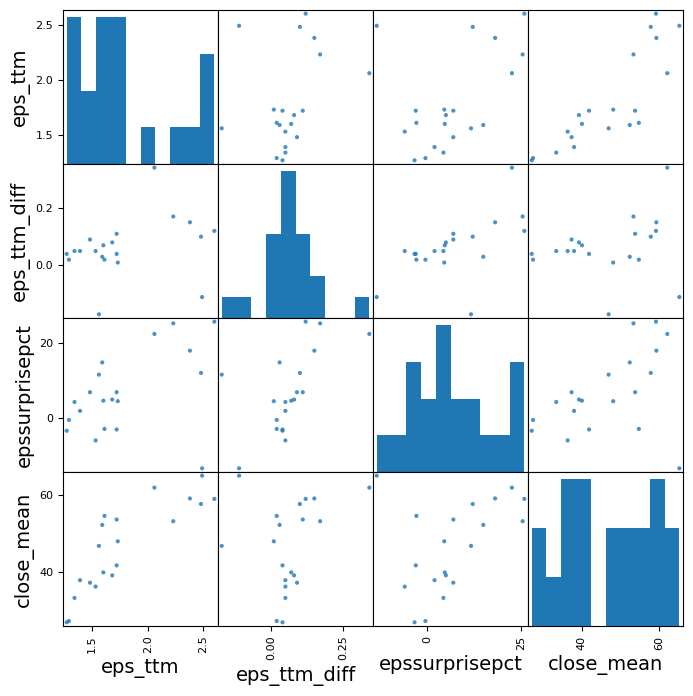

In [122]:
# 산점도 행렬.
# diagonal="hist": 대각선상의 셀에는 각 변수에 대한 히스토그램이 그려지도록.
scatter_matrix(price_earning[["eps_ttm",	"eps_ttm_diff",
                              "epssurprisepct",	"close_mean"]],
               alpha = 0.8, figsize = (8, 8), diagonal="hist")
plt.show()

# 1행 4열의 경우 close_mean과 eps_ttm의 선형관계를 확인할 수 있음.

In [123]:
# 상관계수.
corr = price_earning[["eps_ttm",	"eps_ttm_diff",
                      "epssurprisepct",	"close_mean"]].corr()
corr

,eps_ttm,eps_ttm_diff,epssurprisepct,close_mean
eps_ttm,1.000000,0.277617,0.458074,0.845375
eps_ttm_diff,0.277617,1.000000,0.593368,0.225704
epssurprisepct,0.458074,0.593368,1.000000,0.434751
close_mean,0.845375,0.225704,0.434751,1.000000


In [124]:
# 선형 회귀 모델 (최소 제곱법, ols)
model = ols(
    "close_mean ~ eps_ttm + eps_ttm_diff + epssurprisepct",
    data=price_earning
    ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             close_mean   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     13.69
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           0.000110
Time:                        14:45:00   Log-Likelihood:                -64.071
No. Observations:                  20   AIC:                             136.1
Df Residuals:                      16   BIC:                             140.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.8524      6.929      0.989      0.337      -7.836      21.541
eps_ttm           22.1003      4.022      5.495      0.000      13.574      30.627
eps_ttm_diff      -6.4763     18.642     -0.347      0.733     -45.995      33.043
epssurprisepct     0.1020      0.193      0.528      0.605      -0.308       0.512
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.926
Skew:                           0.675   Prob(JB):                        0.382
Kurtosis:                       2.301   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
model = ols("close_mean ~ eps_ttm", data=price_earning).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             close_mean   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     45.08
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           2.70e-06
Time:                        14:48:48   Log-Likelihood:                -64.246
No. Observations:                  20   AIC:                             132.5
Df Residuals:                      18   BIC:                             134.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8312      6.241      0.934      0.363      -7.282      18.944
eps_ttm       22.8328      3.401      6.714      0.000      15.688      29.977
==============================================================================
Omnibus:                        2.478   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.973
Skew:                           0.649   Prob(JB):                        0.373
Kurtosis:                       2.173   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

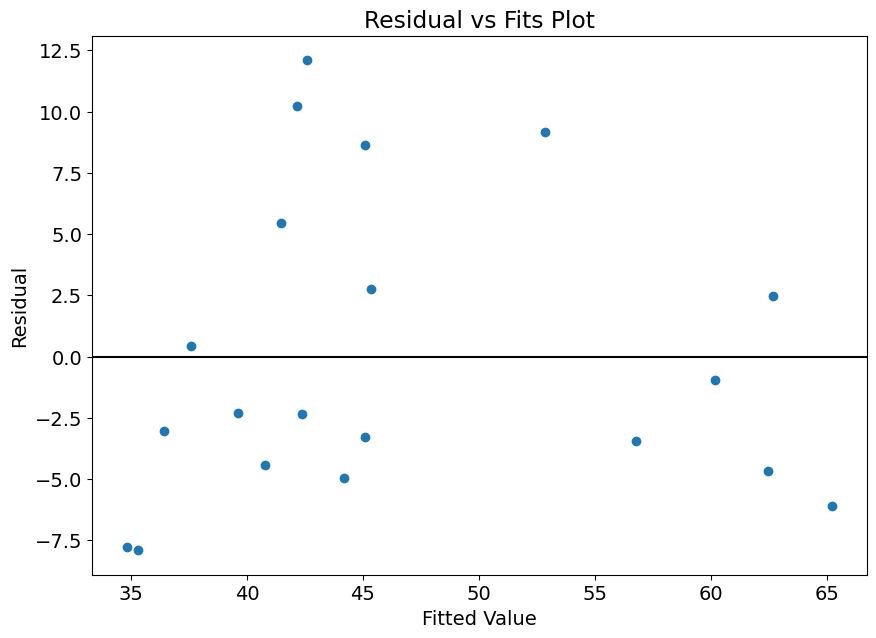

In [129]:
pickle.dump(model, open("model.pickle", "wb"))

# 잔차 분석.
fitted = model.fittedvalues
resid = model.resid
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(fitted, resid)
ax.axhline(y = 0, color = 'black', linestyle = 'solid')
ax.set(xlabel="Fitted Value", ylabel="Residual", title="Residual vs Fits Plot")
plt.show()

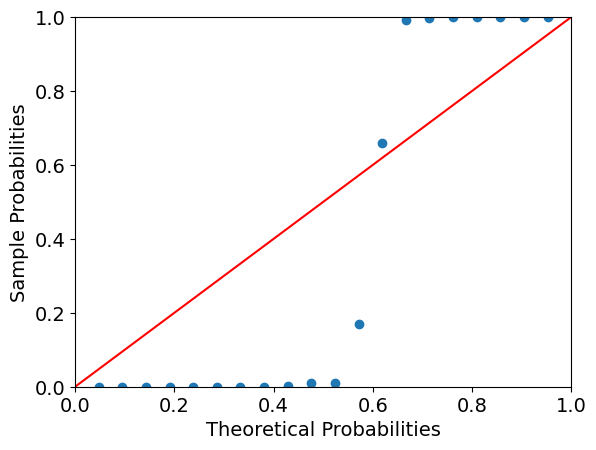

In [130]:
# 잔차 분석 (정규성 확인)
residuals = model.resid
pplot = sm.ProbPlot(residuals)
fig = pplot.ppplot(line="45")
plt.show()

## ↓ Numpy

In [132]:
# 리스트의 리스트로 이차원 배열을 표현. (2행 2열 행렬)
arr = np.array([[1, 2],
                [2, 1]])
arr

array([[1, 2],
       [2, 1]])

In [133]:
# 데이터 프레임의 values 속성에 접근하는 걸로도 얻어낼 수 있음.
X = price_earning[["eps_ttm",
                   "eps_ttm_diff",
                   "epssurprisepct"]].values
y = price_earning[["close_mean"]].values
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [134]:
# shape: 행 크기.
# y.shape: 열 벡터 (20행 1열)
arr.shape, X.shape, y.shape

((2, 2), (20, 3), (20, 1))

In [135]:
# transpose: 전치행렬
X_t = X.transpose()
X_t.shape

(3, 20)

In [167]:
arr

array([[1, 2],
       [2, 1]])

In [168]:
arr + np.array([[1, 0],
                [0, 1]])

array([[2, 2],
       [2, 2]])

In [137]:
arr - np.array([[1, 0],
                [0, 1]])

array([[0, 2],
       [2, 0]])

In [138]:
arr * np.array([[1, 0],
                [0, 1]])

array([[1, 0],
       [0, 1]])

In [139]:
arr / np.array([[2, 1],
                [1, 2]])

array([[0.5, 2. ],
       [2. , 0.5]])

In [140]:
# np.matmul(): 행렬 곱
np.matmul(arr, np.array([[1, 0],
                         [0, 1]]))

array([[1, 2],
       [2, 1]])

In [141]:
# @: 행렬 곱
arr @ np.array([[1, 0],
                [0, 1]])

array([[1, 2],
       [2, 1]])

In [142]:
# 5행 1열 행렬 생성. (ones: 1이 여러개)
np.ones((5, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [143]:
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
X

array([[ 1.000e+00,  2.490e+00, -1.100e-01, -1.329e+01],
       [ 1.000e+00,  2.600e+00,  1.200e-01,  2.578e+01],
       [ 1.000e+00,  2.480e+00,  1.000e-01,  1.212e+01],
       [ 1.000e+00,  2.380e+00,  1.500e-01,  1.805e+01],
       [ 1.000e+00,  2.230e+00,  1.700e-01,  2.532e+01],
       [ 1.000e+00,  2.060e+00,  3.400e-01,  2.250e+01],
       [ 1.000e+00,  1.720e+00,  1.100e-01,  6.990e+00],
       [ 1.000e+00,  1.610e+00,  2.000e-02, -2.800e+00],
       [ 1.000e+00,  1.590e+00,  3.000e-02,  1.491e+01],
       [ 1.000e+00,  1.560e+00, -1.700e-01,  1.167e+01],
       [ 1.000e+00,  1.730e+00,  1.000e-02,  4.590e+00],
       [ 1.000e+00,  1.720e+00,  4.000e-02, -2.950e+00],
       [ 1.000e+00,  1.680e+00,  8.000e-02,  5.020e+00],
       [ 1.000e+00,  1.600e+00,  7.000e-02,  4.720e+00],
       [ 1.000e+00,  1.530e+00,  5.000e-02, -5.870e+00],
       [ 1.000e+00,  1.480e+00,  9.000e-02,  6.980e+00],
       [ 1.000e+00,  1.390e+00,  5.000e-02,  2.010e+00],
       [ 1.000e+00,  1.340e+00,

In [144]:
X_t = X.transpose()
X_t_X = np.matmul(X_t, X)                   # X^T X
X_t_X_inv = np.linalg.inv(X_t_X)            # (X^T X)^-1
X_t_X_inv_X_t = np.matmul(X_t_X_inv, X_t)   # (X^T X)^-1 X^T
coef = np.matmul(X_t_X_inv_X_t, y)          # (X^T X)^-1 X^T y
coef

array([[ 6.85237092],
       [22.10033166],
       [-6.47625745],
       [ 0.1020489 ]])

In [145]:
X = price_earning[["eps_ttm",
                   "eps_ttm_diff",
                   "epssurprisepct"]].values
# axis=0: 열에 대해 mean, var(분산) 함수 적용.
np.mean(X, axis=0), np.var(X, axis=0)

(array([1.7875, 0.063 , 6.822 ]),
 array([1.73508750e-01, 9.85100000e-03, 1.07008366e+02]))

In [146]:
np.mean(X[:, 0]), np.mean(X[:, 1]), np.mean(X[:, 2])

(np.float64(1.7875), np.float64(0.06300000000000001), np.float64(6.822))

In [147]:
arr = np.array([[1, 2],
                [2, 1]])
arr + 1

array([[2, 3],
       [3, 2]])

In [148]:
X_mean = np.mean(X, axis=0)
X_mean.shape, X.shape

# (3,): 값이 3개인 1차원 배열.

((3,), (20, 3))

In [149]:
X_center = X - X_mean
X_center.shape

(20, 3)

In [150]:
np.std(X, axis=0)

array([ 0.41654382,  0.0992522 , 10.34448481])

In [151]:
A = X_center / np.std(X, axis=0)
A.shape

(20, 3)

In [152]:
U, S, V_t = np.linalg.svd(A)

In [153]:
S

array([6.1616955 , 3.83287581, 2.70971798])

In [154]:
V = V_t.transpose()
V

array([[-0.50525198, -0.81155298,  0.29343176],
       [-0.57888616,  0.57090505,  0.5822012 ],
       [-0.64000879,  0.12429473, -0.75824769]])

In [155]:
transformed = np.matmul(A, V)

In [156]:
transformed[:2]

array([[ 1.4012331 , -2.60544583,  0.95427885],
       [-2.49090635, -1.02733649, -0.48290017]])

In [157]:
pca = PCA(n_components=3)
pca.fit(A)

PCA(n_components=3)

In [158]:
pca.singular_values_

array([6.1616955 , 3.83287581, 2.70971798])

In [159]:
pca.components_

array([[ 0.50525198,  0.57888616,  0.64000879],
       [ 0.81155298, -0.57090505, -0.12429473],
       [-0.29343176, -0.5822012 ,  0.75824769]])

In [160]:
pca.transform(A)[:2]

array([[-1.4012331 ,  2.60544583, -0.95427885],
       [ 2.49090635,  1.02733649,  0.48290017]])

## matplotlib을 통한 데이터 시각화



## ↓ 산점도

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [170]:
price_earning = pd.read_csv("price_earning.csv")

In [171]:
price_earning.sort_values(by="month",
                          ascending=True,
                          inplace=True)
price_earning.reset_index(drop=True, inplace=True)
price_earning.head()

,month,eps_ttm,eps_ttm_diff,epssurprisepct,close_mean
0,2015-02,1.27,0.04,-3.28,27.049290
1,2015-05,1.29,0.02,-0.40,27.383825
2,2015-08,1.34,0.05,4.37,33.382857
3,2015-11,1.39,0.05,2.01,37.981950
4,2016-03,1.48,0.09,6.98,37.339364


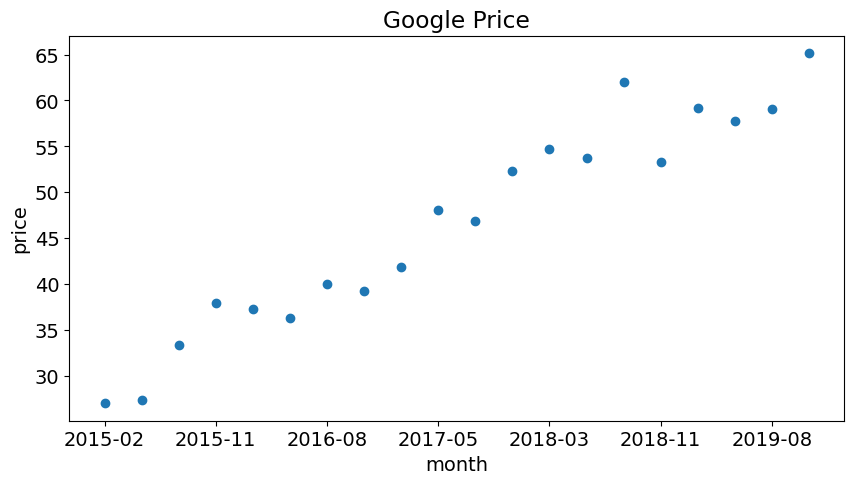

In [172]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.scatter(price_earning["month"], price_earning["close_mean"])
ax.set(xlabel='month', ylabel='price', title='Google Price')
ax.set_xticks(price_earning["month"][np.arange(0, len(price_earning), step=3)])
plt.show()